In [1]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\SYAMNARAYANAN\Downloads\Chocolate Sales.csv")

df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [3]:
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [4]:
df.select_dtypes(include = 'object')

,Sales Person,Country,Product,Date,Amount
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320"
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896"
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501"
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726"
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685"
...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410"
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559"
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086"


In [5]:
df['Amount'] = (df['Amount'].str.replace('$','', regex=False).str.replace(',','', regex=False).astype(float))


In [6]:
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\SYAMNARAYANAN\AppData\Local\Temp\ipykernel_11880\3386729631.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek


In [8]:
df['Is_Weekend'] = df['Day_of_Week'].isin([5,6]).astype(int)

Total Sales

In [9]:
df['Amount'].sum()


np.float64(6183625.0)

Sales by Country

In [10]:
df.groupby('Country')['Amount'].sum().sort_values(ascending=False)


Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

Sales by Product

In [11]:
df.groupby('Product')['Amount'].sum().sort_values(ascending=False)


Product
Smooth Sliky Salty      349692.0
50% Dark Bites          341712.0
White Choc              329147.0
Peanut Butter Cubes     324842.0
Eclairs                 312445.0
99% Dark & Pure         299796.0
85% Dark Bars           299229.0
Organic Choco Syrup     294700.0
Spicy Special Slims     293454.0
Mint Chip Choco         283969.0
Almond Choco            277536.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Raspberry Choco         264740.0
After Nines             261331.0
Fruit & Nut Bars        259147.0
Drinking Coco           256655.0
Orange Choco            256144.0
Baker's Choco Chips     249613.0
Choco Coated Almonds    241486.0
Caramel Stuffed Bars    231588.0
70% Dark Bites          211610.0
Name: Amount, dtype: float64

Sales by Salesperson

In [12]:
df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)


Sales Person
Ches Bonnell           320901.0
Oby Sorrel             316645.0
Madelene Upcott        316099.0
Brien Boise            312816.0
Kelci Walkden          311710.0
Van Tuxwell            303149.0
Dennison Crosswaite    291669.0
Beverie Moffet         278922.0
Kaine Padly            266490.0
Marney O'Breen         259742.0
Barr Faughny           258713.0
Roddy Speechley        251062.0
Gunar Cockshoot        238483.0
Gigi Bohling           232666.0
Karlen McCaffrey       223895.0
Jehu Rudeforth         220976.0
Jan Morforth           219667.0
Curtice Advani         216461.0
Rafaelita Blaksland    210245.0
Husein Augar           205212.0
Andria Kimpton         201747.0
Mallorie Waber         200592.0
Camilla Castle         196616.0
Dotty Strutley         190624.0
Wilone O'Kielt         138523.0
Name: Amount, dtype: float64

Monthly Sales Trend

In [13]:
df.groupby('Month')['Amount'].sum()


Month
1    896105.0
2    699377.0
3    749483.0
4    674051.0
5    752892.0
6    865144.0
7    803425.0
8    743148.0
Name: Amount, dtype: float64

Boxes Shipped Analysis

In [14]:
df.groupby('Product')['Boxes Shipped'].sum().sort_values(ascending=False)


Product
50% Dark Bites          9792
Smooth Sliky Salty      8810
Eclairs                 8757
Caramel Stuffed Bars    8717
Spicy Special Slims     8685
Drinking Coco           8660
Milk Bars               8330
Peanut Butter Cubes     8304
After Nines             8257
White Choc              8240
Mint Chip Choco         8207
99% Dark & Pure         8127
70% Dark Bites          8015
85% Dark Bars           7793
Manuka Honey Choco      7781
Organic Choco Syrup     7749
Fruit & Nut Bars        7738
Orange Choco            7732
Raspberry Choco         7115
Baker's Choco Chips     6998
Almond Choco            6736
Choco Coated Almonds    6464
Name: Boxes Shipped, dtype: int64

Top 10 Highest Single Sales

In [15]:
df.sort_values(by='Amount', ascending=False).head(10)


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Day,Day_of_Week,Is_Weekend
543,Ches Bonnell,India,Peanut Butter Cubes,2022-01-27,22050.0,208,1,27,3,0
135,Van Tuxwell,India,Organic Choco Syrup,2022-05-16,19929.0,174,5,16,0,0
751,Rafaelita Blaksland,New Zealand,Eclairs,2022-02-07,19481.0,51,2,7,0,0
66,Van Tuxwell,Australia,Organic Choco Syrup,2022-08-10,19453.0,14,8,10,2,0
589,Curtice Advani,India,Smooth Sliky Salty,2022-04-19,19327.0,135,4,19,1,0
212,Marney O'Breen,UK,Smooth Sliky Salty,2022-05-13,18991.0,88,5,13,4,0
1008,Kaine Padly,UK,After Nines,2022-01-21,18697.0,176,1,21,4,0
434,Jan Morforth,New Zealand,Mint Chip Choco,2022-06-30,18340.0,285,6,30,3,0
806,Brien Boise,India,85% Dark Bars,2022-08-09,18032.0,205,8,9,1,0
609,Jan Morforth,Australia,Mint Chip Choco,2022-02-22,17626.0,103,2,22,1,0


Correlation Between Amount & Boxes Shipped

In [16]:
df[['Amount','Boxes Shipped']].corr()


,Amount,Boxes Shipped
Amount,1.000000,-0.018827
Boxes Shipped,-0.018827,1.000000


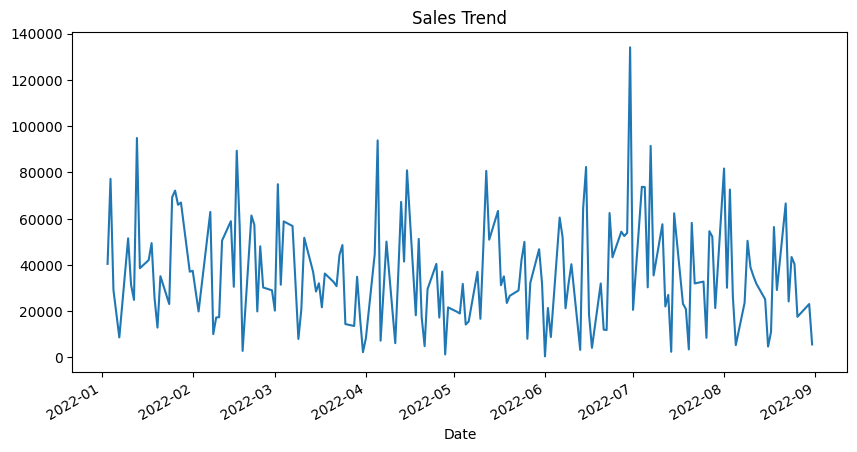

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Date')['Amount'].sum().plot(figsize=(10,5))
plt.title("Sales Trend")
plt.show()


<Axes: xlabel='Amount', ylabel='Count'>

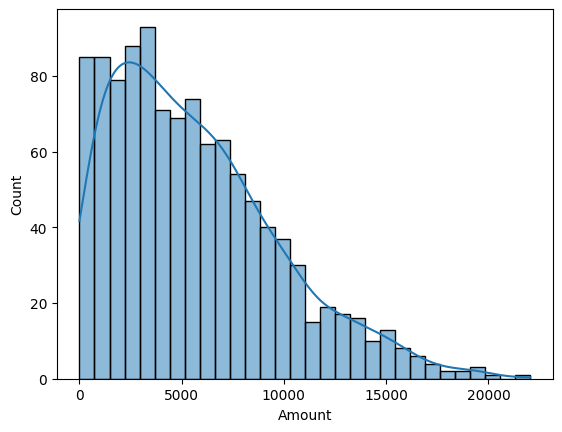

In [18]:
sns.histplot(df['Amount'], bins=30, kde=True)


<Axes: xlabel='Boxes Shipped', ylabel='Amount'>

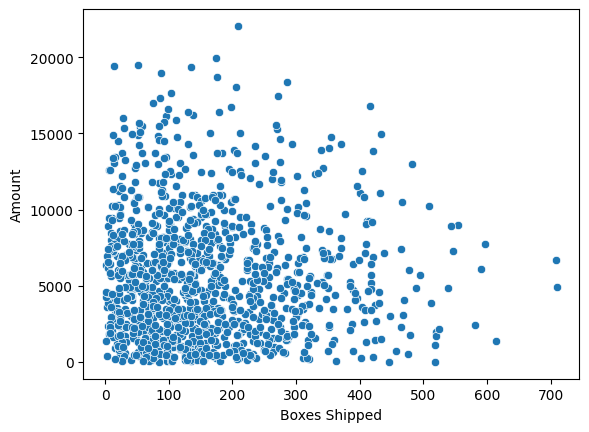

In [19]:
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df)


<Axes: xlabel='Amount'>

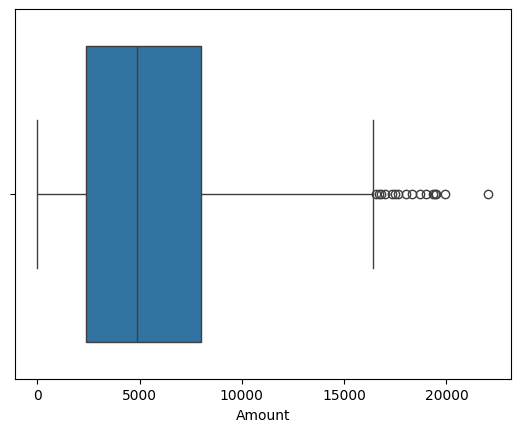

In [20]:
sns.boxplot(x=df['Amount'])
